# Examen Data Science & AI

- Student: StudentNaam
- Studentennummer: StudentNummer
- Datum: Datum
- Klasgroep: Klas


In [1]:
# Package imports for data science
import numpy as np
import pandas as pd
import scipy.stats as stats
import matplotlib.pyplot as plt
import seaborn as sns
from statsmodels.graphics.mosaicplot import mosaic

# Vraag 1 - Wat is het meetniveau van deze variabelen?
-   De lengte van een bloemblad (in mm)
-   Het type bladrand van een bloem (gezaagd, gekarteld, gaaf, enz)
-   De geur van een bloem (geen, licht, sterk, zeer sterk)
-   Gemiddelde bloeitijd van een bloem (in dagen)

Oplossing:

-   Nummeriek
-   Nominaal
-   Nominaal
-   Ratio

# Vraag 2

Een marketing bedrijf werkt voor een klein aantal grote bedrijven en voor een groot aantal
kleine bedrijven. Het bedrijf wenst een aselecte steekproef van 10% te nemen van zijn 320
cliënten. De cliënten worden alfabetisch gesorteerd en vervolgens neemt men client 3, 13,
23, 33, . . .
-   Is dit een aselecte steekproef? Motiveer je antwoord.
-   Welk soort fout wordt hier gemaakt? Leg uit.

Oplossing:

-   Neen, want de kans dat een cliënt wordt geselecteerd waar de naam begint met een `z` is veel kleiner dan wanneer hij zou starten met een `a`.
-   Systematische fout, want het probleem ligt bij de manier waarop de cliënten worden geselecteerd.

# Vraag 3

Van de 180 studenten die het examen Data Science & AI afleggen zijn er 60 studenten die
een Playstation bezitten, 110 die een XBox bezitten terwijl 40 allebei de systemen in hun
bezit hebben.
Noem PS (resp. XB) de gebeurtenis dat een willekeurig geselecteerde student een Play-
station (resp. XBox) bezit.
-   De gebeurtenissen PS en XB zijn: (afhankelijk / onafhankelijk)
-   Geef de kans dat een willekeurig gekozen student de bezitter is van een Playstation of een XBox.
-   Geef de kans dat een willekeurig gekozen student enkel een Playstation bezit.
-   Geef de kans dat een student een XBox bezit als je weet dat deze student een Play-
station heeft.

Oplossing:

-   Onafhankelijk
-   $\frac{60}{180} + \frac{110}{180} - \frac{40}{180} = \frac{130}{180}$
-   $\frac{60}{180} - \frac{40}{180} = \frac{20}{180}$
-   $\frac{40}{60} = \frac{2}{3}$


# Vraag 4

Een autofabrikant voert een crashtest uit met een bepaald model auto en meet de bots-
kracht. De test en het model in kwestie produceren botskrachten die normaal verdeeld zijn
met een gemiddelde van 30 ton en een standaardafwijking van 1,5 ton. Veronderstel dat de
fabrikant een willekeurige steekproef van 4 auto’s test en hiervan de gemiddelde botskracht
van de steekproef berekent.
Wat is de kans dat het steekproefgemiddelde x van de botskracht voor een steeksproef van
4 auto’s meer is dan 30.75 ton?
-   p(x > 30.75) ≈ 0.24
-   P(x > 30.75) ≈ 0.09
-   p(x > 30.75) ≈ 0.16
-   We kunnen deze kans niet berekenen omdat het steeproefgemiddelde niet normaal verdeeld is.

p-value: 0.19550
p > a: do not reject H0


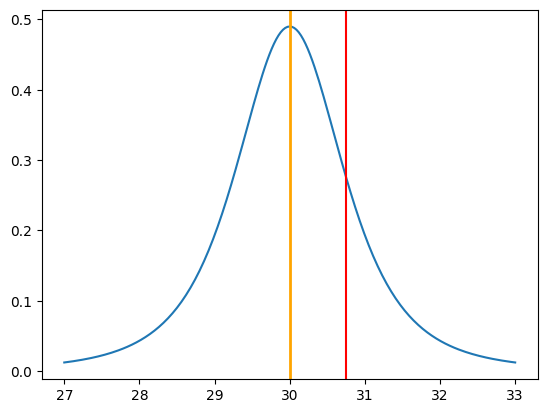

In [12]:
# Properties of the sample:
n = 4           # sample size
sm = 30.75      # sample mean
s = 1.5         # sample standard deviation (assumed to be known)
a = 0.05        # significance level (chosen by the researcher)
m0 = 30.0       # hypothetical population mean (H0)

# Plotting the sample distribution
# Gauss-curve plot:
# X-values
dist_x = np.linspace(m0 - 4 * s/np.sqrt(n), m0 + 4 * s/np.sqrt(n), num=201)
# Y-values for the Gauss curve
dist_y = stats.t.pdf(dist_x, loc = m0,scale = s/np.sqrt(n), df = n-1)
fig, dplot = plt.subplots(1, 1)
# Plot the Gauss-curve
dplot.plot(dist_x, dist_y)
# Show the hypothetical population mean with an orange line
dplot.axvline(m0, color="orange", lw=2)
# Show the sample mean with a red line
dplot.axvline(sm, color="red")

p = stats.t.sf(sm, loc=m0, scale=s/np.sqrt(n), df=n-1)
print("p-value: %.5f" % p)
if(p < a):
    print("p < a: reject H0")
else:
    print("p > a: do not reject H0")

# Vraag 5

Uit een populatie met standaardafwijking σ = 580 werd de hieronder gegeven steekproef
getrokken. Bereken een 97.5%-betrouwbaarheidsinterval voor het populatiegemiddelde.

-   Ondergrens
-   Bovengrens

In [13]:
sample = np.array([
    4377, 4093, 4835, 5287, 3888, 5271, 4633, 4744, 5106, 5210, 5039,
    4672, 5515, 5610, 4091, 4909, 3724, 4558, 4663, 5501, 5252, 5983,
    4957, 5495, 4520, 5139, 4461, 5099, 4824, 3761, 5198, 4934, 3464,
    6242, 3993, 4745, 5625, 5170, 4871, 5458, 4485, 5534, 4463, 4976,
    4903, 3851, 5267, 4631, 5547, 5236, 4874, 4797, 4706, 5071, 5680,
    3560, 5012, 4292, 4476, 4319, 4511, 4951, 4067, 4107, 4559, 3710,
    3747, 4376, 3969, 5365, 5001, 5162, 3979, 3376, 4055, 4341, 4622,
    4169, 4872, 5646, 4405, 4598, 4770, 4733, 4542, 5281, 4471, 4406,
    4227, 4522
])

In [15]:
# Step 1.
m = sample.mean()      # Sample mean
s = 580      # Population standard deviation
n = len(sample)      # Sample size
alpha = 0.975  # 1 - alpha is the confidence level

# Step 2.
z = stats.norm.isf(alpha/2)
print("z-score: %.5f" % z)

# Step 3.
lo = m - z * s / np.sqrt(n)
hi = m + z * s / np.sqrt(n)
print("Confidence interval: [%.4f, %.4f]" % (lo, hi))

z-score: 0.03134
Confidence interval: [4721.8285, 4725.6604]


Oplossing:

-   Ondergrens: 4721.8285
-   Bovengrens: 4725.6604

## Vraag 6

De steekproef die hieronder gegeven is, bevat gerelateerde meetresultaten van een vari-
abele Count op twee tijdstippen (time1 en time2), telkens op een overeenkomstige plaats.
We willen weten of de metingen op het eerste tijdstip signiﬁcant verschillend zijn van die op
het tweede tijdstip.
Gebruik een geschikte statistische toets (met signiﬁcantieniveau 5%) om deze uitspraak te
veriﬁëren

In [16]:
my_sample = pd.DataFrame(data={
    'time1': [425, 530, 607, 693, 485, 341, 590, 484, 391, 561, 572, 415, 496, 567, 320, 645, 551, 574, 553, 363],
    'time2': [470, 382, 286, 547, 422, 574, 431, 469, 393, 424, 411, 517, 472, 368, 529, 475, 491, 658, 549, 268]
})

-   Welke toets moet je gebruiken om deze onderzoeksvraag te beantwoorden? Wees zo speciﬁek mogelijk!
-   Formuleer de nulhypothese en de alternatieve hypothese
-   Bereken de p-waarde
-   Trek een besluit op basis van de vorige stap en beantwoord de onderzoeksvraag.
-   Geef het bereik voor de groep time1
-   Geef de mediaan voor de groep time1

In [25]:
statistic, p = stats.ttest_rel(my_sample["time1"], my_sample["time2"], alternative="less")
a = 0.05

print(f"p-value: {p:.5f}")
if(p < a):
    print("p < a: reject H0")
else:
    print("p > a: do not reject H0")

print(f"range: {my_sample['time1'].max() - my_sample['time1'].min():.2f}")

print(f"mean: {my_sample['time1'].median():.4f}")

p-value: 0.94258
p > a: do not reject H0
range: 373.00
mean: 540.5000


Oplossing:

-   $t$-test for paired samples.
-   $H_0: \mu_{0} = \mu_{1}$, $H_1: \mu_{0} \neq \mu_{1}$
-   $p$-value: 0.94258
-   Er is niet genoeg bewijs om de $H_0$ te verwerpen.
-   Range time1: 373.00
-   Mediaan time1: 540.5000

# Vraag 7

In de steekproef die hieronder gegeven is, willen we onderzoeken of er een verband bestaat tussen de variabele Group (onafhankelijke variabele) en Color (afhankelijke variabele).
Gebruik een geschikte statistische toets (met signiﬁcantieniveau 5%) om dit te onderzoeken.

In [27]:
my_sample = pd.DataFrame(data = {
'Group': ['Staff', 'Faculty', 'Faculty', 'Staff', 'Staff', 'Student', 'Staff',
            'Student', 'Staff', 'Faculty', 'Faculty', 'Student', 'Student',
            'Faculty', 'Student', 'Staff', 'Student', 'Faculty', 'Staff',
            'Staff', 'Staff', 'Staff', 'Faculty', 'Staff', 'Faculty',
            'Faculty', 'Student', 'Staff', 'Staff', 'Staff', 'Student',
            'Student', 'Staff', 'Faculty', 'Student', 'Staff', 'Faculty',
            'Student', 'Faculty', 'Staff', 'Student', 'Student', 'Faculty',
            'Student', 'Student', 'Faculty', 'Staff', 'Staff', 'Student',
            'Student', 'Student', 'Faculty', 'Staff', 'Faculty', 'Staff',
            'Staff', 'Student', 'Staff', 'Student', 'Staff', 'Student',
            'Faculty', 'Staff', 'Staff', 'Faculty', 'Student', 'Staff',
            'Staff', 'Faculty', 'Faculty', 'Staff', 'Faculty', 'Student',
            'Student', 'Faculty', 'Staff', 'Student', 'Staff', 'Staff',
            'Faculty'],
'Color': ['blue', 'red', 'red', 'blue', 'blue', 'red', 'blue', 'green', 'red',
            'red', 'green', 'red', 'blue', 'blue', 'blue', 'green',
            'green', 'red', 'green', 'green', 'green', 'red', 'red',
            'blue', 'green', 'blue', 'red', 'green', 'green', 'green',
            'blue', 'green', 'green', 'red', 'green', 'green', 'blue',
            'red', 'red', 'blue', 'green', 'green', 'green', 'green',
            'green', 'red', 'red', 'green', 'green', 'green', 'red',
            'green', 'green', 'green', 'red', 'blue', 'blue', 'green',
            'red', 'green', 'green', 'red', 'red', 'green', 'red', 'blue',
            'green', 'green', 'green', 'green', 'blue', 'red', 'red',
            'green', 'blue', 'green', 'green', 'green', 'green', 'red']
})

-   Welke toets moet je gebruiken om deze onderzoeksvraag te beantwoorden? Wees zo speciﬁek mogelijk!
-   Bereken de teststatistiek (geef symbool en waarde)
-   Bereken de p-waarde
-   Trek een besluit op basis van de vorige stap en beantwoord de onderzoeksvraag.
-   Is de regel van Cochran voldaan? Motiveer je antwoord!
-   Bereken Cramér’s V en interpreteer deze waarde.

In [38]:
observed = pd.crosstab(my_sample.Group, my_sample.Color)
chi2, p, df, expected = stats.chi2_contingency(observed)


alpha = .05
dimensions = observed.shape
dof = (dimensions[0]-1) * (dimensions[1]-1)

print("Degrees of freedom: %d" % df)
print("χ²                : %.4f" % chi2)
print("Degrees of freedom : %d" % dof)

# Calculate critical value
g = stats.chi2.isf(alpha, df = dof)
print("Critical value     : %.4f" % g)

# Calculate p-value
p = stats.chi2.sf(chi2, df=dof)
print("p-value            : %.4f" % p)

if(p < a):
    print("p < a: reject H0")
else:
    print("p > a: do not reject H0")

dof = min(observed.shape) - 1
cramers_v = np.sqrt(chi2 / (dof * n))
print("Cramér's V         : %.4f" % cramers_v)

Degrees of freedom: 4
χ²                : 8.7762
Degrees of freedom : 4
Critical value     : 9.4877
p-value            : 0.0669
p > a: do not reject H0
Cramér's V         : 0.2208


-   Chi-squared and Cramér's V
-   χ² = 8.7762
-   $p$-value = 0.0669
-   Er is niet voldoende bewijs om de $H_0$ te verwerpen.
-   Ja, 
    -   de consistency table -> 2x2
    -   alle verwachte waarden > 1
    -   minstens 20% van de verwachte waarden > 5
-   $Cramér's\ V$ = 0.2208
    -   Er is een matige associatie tussen `Group` en `Color`.

# Vraag 8

Beschouw de steekproef die hieronder gegeven is

In [42]:
sample_data = pd.DataFrame(data = {
'x': [5383, 5273, 5397, 4149, 6403, 5161, 5237, 5437, 5443, 4700,
4538, 4857, 5342, 5092, 5512, 5690, 4587, 4450, 4625,
5044, 5066, 4770, 4960, 4500, 5315, 4598, 6106, 4879,
4790, 4236, 5660, 4395, 5580, 5188, 4797, 4901, 5003,
5812, 4494, 4897, 4404, 4876, 5027, 5216, 5859, 5603,
5150, 4906, 4888, 4990, 5073, 4997, 5547, 5391, 5147,
4967, 5020, 5580, 5493, 4664, 4396, 4868, 4518, 5154,
4667, 5211, 5132, 6275, 4972, 4804, 5552, 5333, 4607,
5133, 4803, 4721, 4530, 4899, 5826, 4768, 5623, 4426,
5738, 4907, 5057, 4903, 4688, 4936, 5181, 5329, 5144,
4927, 4024, 4890, 4176, 5638, 5070, 6315, 4795, 4887],
'y': [4500, 4944, 4423, 4847, 4364, 4642, 4185, 4549, 4452, 4748,
4409, 4906, 4343, 4695, 4595, 4338, 4845, 4865, 4447,
4290, 4442, 4537, 4998, 4761, 4479, 4132, 4084, 4309,
4416, 4717, 4446, 4160, 4409, 4499, 4703, 4375, 4513,
4352, 4638, 4600, 4073, 4483, 4548, 4273, 4412, 4845,
4150, 4677, 4530, 4811, 4607, 4361, 4831, 4655, 5036,
4255, 4464, 4875, 4480, 4894, 4399, 4417, 4515, 4927,
4041, 4527, 4525, 4536, 4462, 4355, 4473, 4828, 4293,
4455, 4526, 4170, 4554, 4423, 4944, 4757, 4619, 4691,
4178, 4986, 4073, 4786, 4873, 4656, 4220, 4270, 4550,
4467, 4314, 4608, 4661, 4499, 4228, 4519, 4526, 4925]})

-   Bereken de richtingscoëfﬁciënt van de regressierechte
-   Bereken het snijpunt van de regressierechte met de y-as
-   Bereken de correlatiecoëfﬁciënt (symbool + waarde)
-   Geef een interpretatie voor de waarde van de correlatiecoëfﬁciënt
-   Bereken de determinatiecoëfﬁciënt (symbool + waarde)
-   Geef een interpretatie voor de waarde van de determinatiecoëfﬁciënt

Regression line: ŷ = 4737.65 + -0.04 x
4737.65
R = -0.0808460923471555
R² = 0.006536090647804794


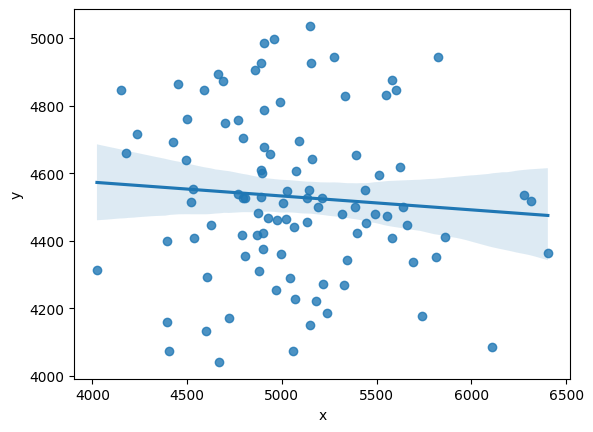

In [49]:
from sklearn.linear_model import LinearRegression

x = sample_data.x.values.reshape(-1,1)
y = sample_data.y

model = LinearRegression().fit(x, y)

print(f"Regression line: ŷ = {model.intercept_:.2f} + {model.coef_[0]:.2f} x")

sns.regplot(x=sample_data.x, y=sample_data.y)

print(f"{model.predict([[0]])[0]:.2f}")

cor = np.corrcoef(sample_data.x, sample_data.y)[0][1]
print(f"R = { cor }")
print(f"R² = {cor ** 2}")

-   -0.04
-   y = 4737.65
-   R = 0.0808460923471555
-   Er is een zeer kleine correlatie tussen beide variable.
-   R² = 0.006536090647804794
-   Er is een zeer kleine correlatie tussen beide variable.